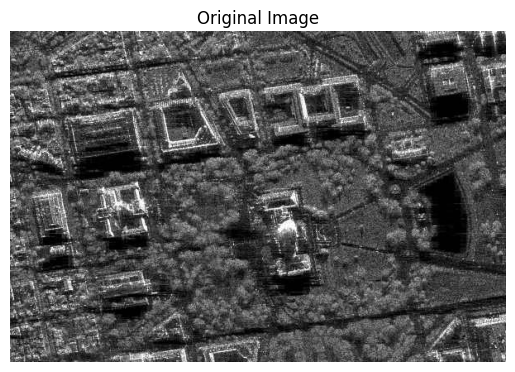

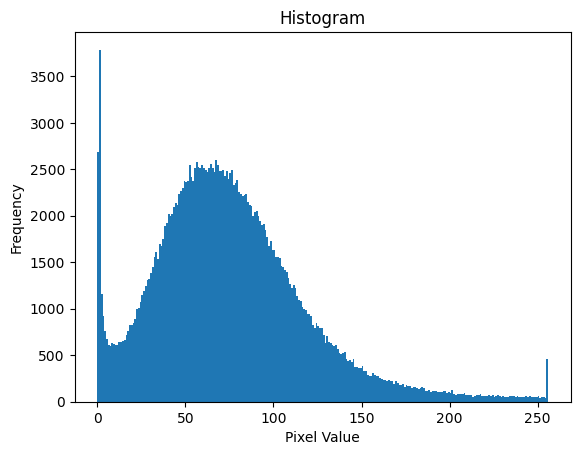

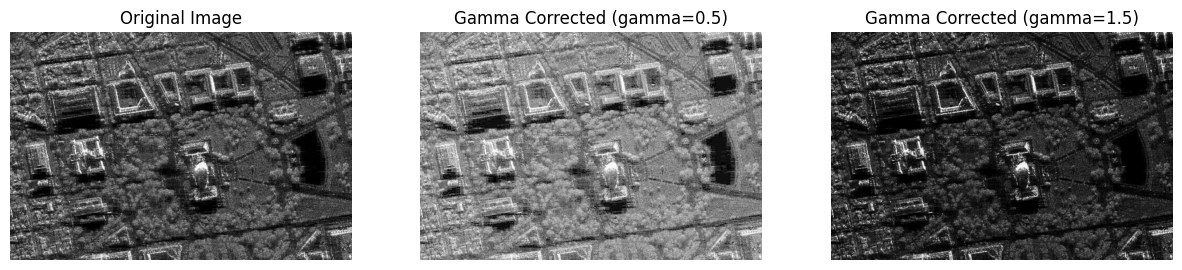

MSE (gamma=0.5): 102.92194583333334
SSIM (gamma=0.5): 0.7875008686792753
MSE (gamma=1.5): 109.49745416666667
SSIM (gamma=1.5): 0.8065788107754002


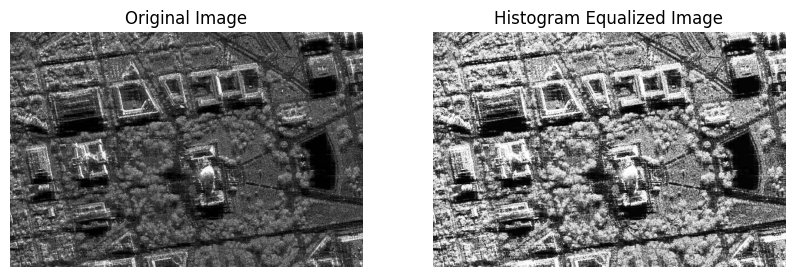

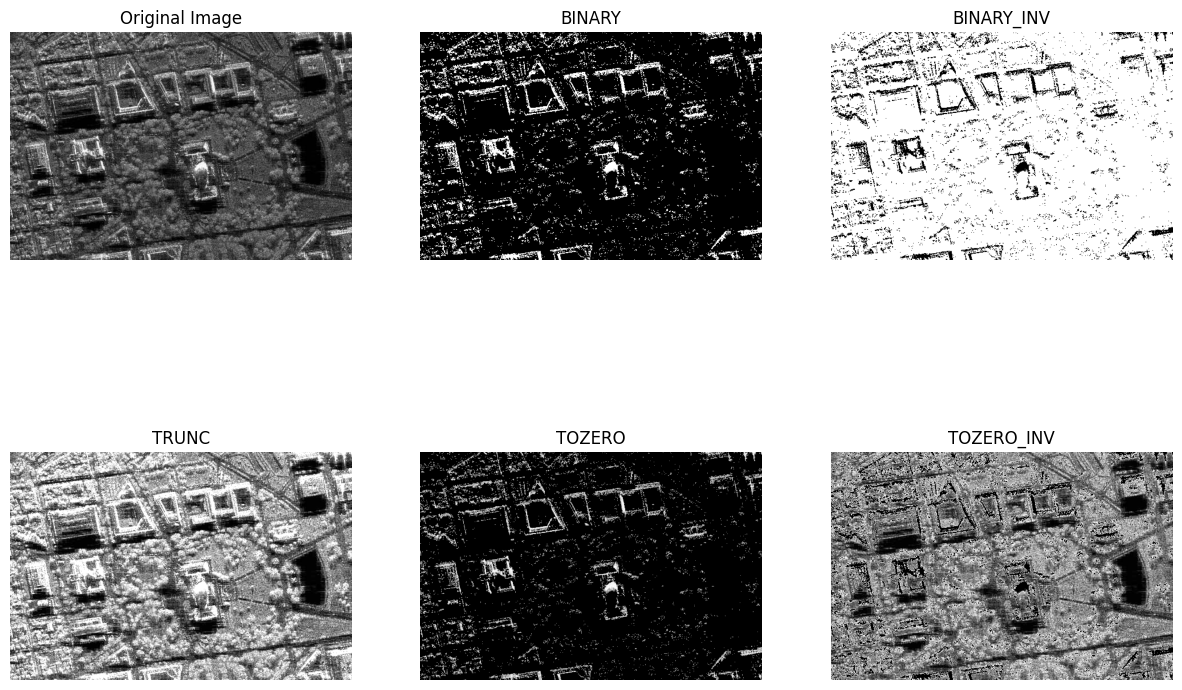

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim


img = cv2.imread('sar_1_gray.jpg', cv2.COLOR_BGR2GRAY)


plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


plt.hist(img.ravel(), 256, [0, 256])
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()


def gamma_correction(image, gamma):
    gamma_corrected = np.power(image / 255.0, gamma)
    gamma_corrected = np.uint8(gamma_corrected * 255)
    return gamma_corrected

gamma_low = 0.5
gamma_high = 1.5
img_gamma_low = gamma_correction(img, gamma_low)
img_gamma_high = gamma_correction(img, gamma_high)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_gamma_low, cmap='gray')
plt.title(f'Gamma Corrected (gamma={gamma_low})')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_gamma_high, cmap='gray')
plt.title(f'Gamma Corrected (gamma={gamma_high})')
plt.axis('off')

plt.show()


def mse(image1, image2):
    return np.mean((image1 - image2) ** 2)

def calculate_ssim(image1, image2):
    return ssim(image1, image2)

mse_low = mse(img, img_gamma_low)
mse_high = mse(img, img_gamma_high)
ssim_low = calculate_ssim(img, img_gamma_low)
ssim_high = calculate_ssim(img, img_gamma_high)

print(f'MSE (gamma={gamma_low}): {mse_low}')
print(f'SSIM (gamma={gamma_low}): {ssim_low}')
print(f'MSE (gamma={gamma_high}): {mse_high}')
print(f'SSIM (gamma={gamma_high}): {ssim_high}')


eq_gray = cv2.imread('eq_gray.jpg', cv2.IMREAD_GRAYSCALE)
img_eq = cv2.equalizeHist(img)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_eq, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')

plt.show()


_, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()
